<div class = "page-header">
    <h1 class = "alert alert-info">
    Reducing dimensionality and applying hierarchical clustering <br/>
    <small>
        Gabriel azevedo Ferreira - started 1-24-2017<br/>
        From : Reducing dimensionality and applying hierarchical clustering (Fiuzao)
    </small>
    </h1> 
</div>

<div class="alert alert-success">
    <h2>
        Imports
    </h2>
</div>
<h4 class="alert alert-warning">Importing libraries and checking working directory</h4>


## Basketbal positions
* **Center**: Usually the tallest player. Position demands a lot of physical contact. On offense, receives ball and shoots close to the basket. Serves as the last line of defense, blocking opponents’ shots and rebounding their misses.

* **Power Forward**: Tall player who relies on strength and toughness to control activity in the lane. Frequently rebounds, especially on defense. Has a decent shot from short-range and scores many points by rebounding missed shots and quickly shooting them.

* **Small Forward**: Versatile and very athletic player. Aggressively attacks the defense by driving and cutting towards the basket, but also has a consistent outside shot.

* **Shooting Guard**: A tenacious defender with an aptitude for stealing the ball. On offense, serves as the secondary ball handler and sharpshooter. Has the ability to convert shots from three-point range.

* **Point Guard**: Leader of offense who uses superb passing and dribbling skills to set up teammates for open shots. Has a reliable jump shot and ability to break down a defense by driving into the lane.

In [202]:
import pandas as pd
import numpy as np
import os
print os.getcwd();

# import libraries for visualization
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab

#import libraries for features decomposition
import sklearn as sk

/home/jarvis/Documents/Git/TDA-NBA/notebooks


<h4 class="alert alert-warning"/> Setting up visualization parameters

In [203]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None


<h4 class="alert alert-warning"/>Importing Data

In [206]:
#import data
df = pd.read_csv('../Data/NBA-preprocessed-data.csv')
print "(rows,cols) =",df.shape
df.head(10)

(rows,cols) = (476, 30)


,Unnamed: 0,Player,TEAM,AGE,GP,W,L,MIN,FGM,FGA,FG%,03:00:00 PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-,PosicAbbrev
0,0,Aaron Brooks,CHI,31,69,36,33,16.1,2.7,6.8,40.1,1.0,2.7,35.7,0.7,0.9,76.6,0.3,1.2,1.5,2.6,1.2,0.4,0.1,1.9,0,0,7.1,-0.1,PG
1,1,Aaron Gordon,ORL,20,78,32,46,23.9,3.5,7.4,47.3,0.5,1.8,29.6,1.7,2.5,66.8,2.0,4.5,6.5,1.6,0.8,0.8,0.7,2.0,12,0,9.2,-1.0,PF
2,2,Aaron Harrison,CHA,21,21,15,6,4.4,0.2,0.9,26.3,0.1,0.5,30.0,0.2,0.6,41.7,0.2,0.5,0.7,0.1,0.2,0.3,0.0,0.5,0,0,0.9,-0.3,SG
3,3,Adreian Payne,MIN,25,52,18,34,9.3,1.0,2.8,36.6,0.2,0.6,28.1,0.3,0.5,65.4,0.4,1.8,2.1,0.6,0.7,0.3,0.2,1.5,0,0,2.5,-2.3,PF
4,4,Al Horford,ATL,30,82,48,34,32.1,6.5,12.8,50.5,1.1,3.1,34.4,1.3,1.6,79.8,1.8,5.5,7.3,3.2,1.3,0.8,1.5,2.0,17,0,15.2,2.8,C
5,5,Al Jefferson,CHA,31,47,33,14,23.3,5.2,10.7,48.5,0.0,0.0,0.0,1.5,2.4,64.9,1.2,5.2,6.4,1.5,0.7,0.6,0.9,2.5,7,0,12.0,1.0,C
6,6,Al-Farouq Aminu,POR,25,82,44,38,28.5,3.6,8.8,41.6,1.5,4.3,36.1,1.4,1.9,73.7,1.2,4.9,6.1,1.7,1.5,0.9,0.6,2.1,8,0,10.2,0.7,SF
7,7,Alan Anderson,WAS,33,13,8,5,14.8,1.6,4.5,35.6,0.9,2.8,32.4,0.8,1.2,73.3,0.1,2.0,2.1,1.1,0.2,0.3,0.1,1.9,0,0,5.0,2.3,SG
8,8,Alan Williams,PHX,23,10,3,7,6.8,1.0,2.4,41.7,0.0,0.0,0.0,0.9,1.4,64.3,1.4,2.4,3.8,0.5,0.6,0.4,0.5,1.5,1,0,2.9,0.1,PF
9,9,Alec Burks,UTA,24,31,13,18,25.7,4.4,10.8,41.0,1.0,2.5,40.5,3.4,4.5,75.2,0.5,3.0,3.5,2.0,1.6,0.6,0.1,2.3,0,0,13.3,-0.4,SG


<h4 class = "alert alert-warning"/> Assign position label for each player <br/> Also taking only numeric values

In [208]:
dict = {' PG': 1, ' PF': 2, ' SG' : 3, ' SF' : 4, ' C' : 5}
position_labels = [dict[x] for x in df['PosicAbbrev']]
df_numVar = df.select_dtypes(include=['number']).drop('Unnamed: 0',1)
df_numVar.head()

,AGE,GP,W,L,MIN,FGM,FGA,FG%,03:00:00 PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-
0,31,69,36,33,16.1,2.7,6.8,40.1,1.0,2.7,35.7,0.7,0.9,76.6,0.3,1.2,1.5,2.6,1.2,0.4,0.1,1.9,0,0,7.1,-0.1
1,20,78,32,46,23.9,3.5,7.4,47.3,0.5,1.8,29.6,1.7,2.5,66.8,2.0,4.5,6.5,1.6,0.8,0.8,0.7,2.0,12,0,9.2,-1.0
2,21,21,15,6,4.4,0.2,0.9,26.3,0.1,0.5,30.0,0.2,0.6,41.7,0.2,0.5,0.7,0.1,0.2,0.3,0.0,0.5,0,0,0.9,-0.3
3,25,52,18,34,9.3,1.0,2.8,36.6,0.2,0.6,28.1,0.3,0.5,65.4,0.4,1.8,2.1,0.6,0.7,0.3,0.2,1.5,0,0,2.5,-2.3
4,30,82,48,34,32.1,6.5,12.8,50.5,1.1,3.1,34.4,1.3,1.6,79.8,1.8,5.5,7.3,3.2,1.3,0.8,1.5,2.0,17,0,15.2,2.8


<h2 class="alert alert-success">
        Performing PCA (dim. reduction)
</h2>
<h4 class = "alert alert-warning"/>Scaling data

In [209]:
df_scaled = sk.preprocessing.scale(df_numVar)


<h4 class = "alert alert-warning"/> Computing new coordinates

In [210]:
pca = sk.decomposition.PCA(n_components=10)
df_red = pca.fit_transform(df_scaled)

print pca.explained_variance_ratio_
print "variance sum =",sum(pca.explained_variance_ratio_)

[ 0.43475204  0.15423664  0.06942175  0.06189472  0.04020476  0.03975554
  0.03523419  0.02762718  0.02496428  0.02066755]
variance sum = 0.908758649168


<h4 class = "alert alert-warning"/> 3D plotting

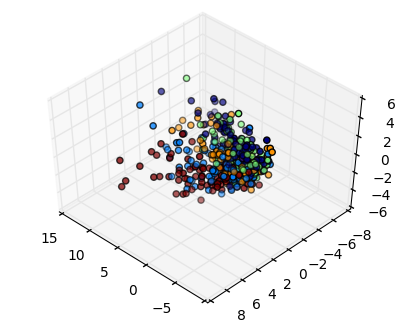

In [211]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(df_red[:, 0], df_red[:, 1], df_red[:, 2], c=position_labels)

<h4 class = "alert alert-warning"/> 2D plotting

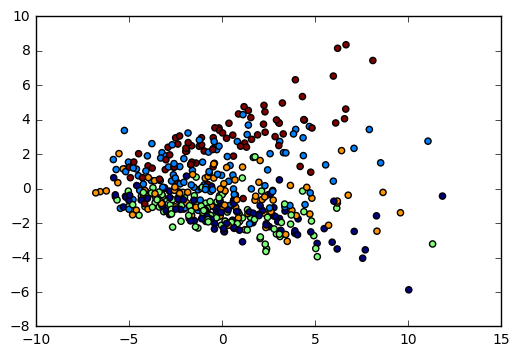

In [212]:
pylab.scatter(df_red[:, 0], df_red[:, 1], c=position_labels)
pylab.show()

In [213]:
#taking a look to the columns
columns = ["col "+str(i) for i in range(1,len(df_red[0])+1)]
pca_df = pd.DataFrame(data=df_red, columns=columns)
pca_df.head(10)

,col 1,col 2,col 3,col 4,col 5,col 6,col 7,col 8,col 9,col 10
0,-0.818362,-1.745823,-1.054732,-0.326380,-0.283649,0.723419,0.353418,0.160482,0.033447,-0.222083
1,1.680696,1.813241,-0.050192,-1.385147,1.558887,-0.008480,-0.662837,-0.388838,0.005877,-0.096911
2,-5.192094,-0.442799,1.206296,1.114864,1.868035,-0.376957,-0.100838,-0.790334,-0.687667,-0.904790
3,-3.096610,0.062153,0.198832,-0.798300,0.614774,0.795504,-0.144761,-0.443429,-0.109845,-0.283440
4,4.197414,1.290535,-1.744407,-0.016021,0.171099,-0.618143,0.747632,-0.614597,0.519980,0.136339
5,1.215384,2.646345,-0.224770,0.811108,-1.169420,-0.817438,0.823446,0.110470,-0.771233,0.190643
6,2.473583,-0.359096,-0.985514,-0.882645,1.210213,-0.258567,0.479143,-0.724368,-0.211904,0.336390
7,-2.613607,-1.217065,0.058497,1.384282,-0.902032,-0.904646,1.513701,-1.012712,0.206045,0.324316
8,-3.230363,2.089231,1.424131,1.057826,-0.077171,-0.650546,-0.191864,-0.431856,-0.908864,0.711807
9,1.369559,-1.223758,1.865232,0.381530,-0.404269,-1.467945,-0.493633,-0.084155,0.199989,-0.318640


<h4 class = "alert alert-warning">Repeting the previous PCA keeping into account only different positions <br/> TODO</h4>

178
(178, 30)
[ 0.39976892  0.20113103  0.06989474  0.05455685  0.04301572  0.03717402
  0.03165408  0.0302965   0.02167962  0.01963645]
variance sum = 0.90880792708


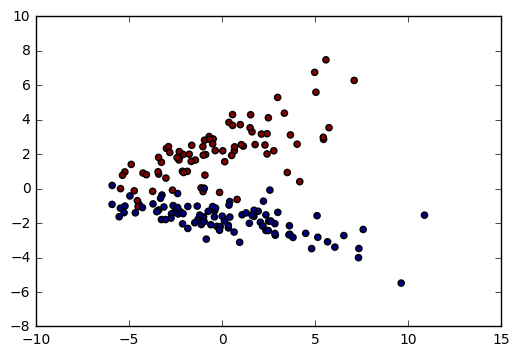

In [218]:
dict = {' PG': 1, ' PF': 2, ' SG' : 3, ' SF' : 4, ' C' : 5}
states = [1,5]
posic2 = []
for x in df['PosicAbbrev']:
    if dict[x] in states :
        posic2.append(dict[x])

#df2 = df[df['PosicAbbrev'].isin((' SG',' PF',' SF'))]
df2 = df[np.in1d(np.array(position_labels),states)]

df_numVar = df2.select_dtypes(include=['number'])

print len(posic2)
print df2.shape

df_scaled = sk.preprocessing.scale(df_numVar)

pca = sk.decomposition.PCA(n_components=10)
df_red = pca.fit_transform(df_scaled)

print pca.explained_variance_ratio_
print "variance sum =",sum(pca.explained_variance_ratio_)

pylab.scatter(df_red[:, 0], df_red[:, 1], c=posic2)
pylab.show()

In [178]:
foo = np.arange(35, 46)
mask = np.any([(foo < 40)], axis=0)
mask
[(foo < 40)]

[array([ True,  True,  True,  True,  True, False, False, False, False,
        False, False], dtype=bool)]

In [192]:
#[(np.array(position_labels) in [1,2])]
#df2 = df[(np.array(position_labels) in [1,2])]
states = [1,2,3]
np.in1d(np.array(position_labels),states)
#df2

array([ True,  True,  True,  True, False, False, False,  True,  True,
        True, False,  True, False,  True, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
       False,  True,  True, False, False, False,  True,  True,  True,
       False,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True,


<h1> Alerts Example</h1>


<div class="alert alert-success">
<h2>
Submit successfully!
</h2>
</div>

<div class="alert alert-info">
For more updates visit our offical forum.
</div>

<div class="alert alert-danger">
Error
</div>

<div class="alert alert-warning"> 
Don't use caps keys.
</div>
